In [28]:
#from InterFaceGAN.models.stylegan_generator import StyleGANGenerator
#from models.latent_optimizer import PostSynthesisProcessing
#from models.image_to_latent import ImageToLatent, ImageLatentDataset
#from models.losses import LogCoshLoss
from im2latent import *
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from glob import glob
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pickle
import pandas as pd
import sys
sys.path.append('/home/jechterh/private/LGAN/labelGAN/StyleGAN.pytorch/')
sys.path.append('/home/jechterh/private/LGAN/labelGAN/StyleGAN.pytorch/data/')
from GAN import Generator

In [29]:
path = '/home/jechterh/private/LGAN/labelGAN/datasetGAN_release/datasetGAN/generations/latent_stylegan1.npy'

In [30]:
latent = np.load(path,allow_pickle=True)

In [31]:
latent.shape

(99, 512)

# Create Dataloaders
Using a 50,000 image dataset. Generated with the generated_data.py script at https://github.com/ShenYujun/InterFaceGAN.

In [11]:
augments = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image_size = 256

directory = "/home/jechterh/private/LGAN/labelGAN/datasetGAN_release/datasetGAN/generations/"
filenames = sorted(glob(directory + "*.jpg"))

train_filenames = filenames[0:80]
validation_filenames = filenames[80:90]

dlatents = np.load(directory + "latent_stylegan1.npy")

train_dlatents = dlatents[0:80]
validation_dlatents = dlatents[80:90]

train_dataset = ImageLatentDataset(train_filenames, train_dlatents, transforms=augments)
validation_dataset = ImageLatentDataset(validation_filenames, validation_dlatents, transforms=augments)
bs = 10
train_generator = torch.utils.data.DataLoader(train_dataset, batch_size=bs)
validation_generator = torch.utils.data.DataLoader(validation_dataset, batch_size=bs)

In [12]:
n = next(iter(train_dataset))
n[0].shape, n[1].shape

(torch.Size([3, 256, 256]), (512,))

# Instantiate Model

In [13]:
image_to_latent = ImageToLatent(image_size).cuda()
optimizer = torch.optim.Adam(image_to_latent.parameters())
criterion = LogCoshLoss()

# Train Model

In [14]:
epochs = 20
validation_loss = 0.0

progress_bar = tqdm(range(epochs))
for epoch in progress_bar:    
    running_loss = 0.0
    
    image_to_latent.train()
    for i, (images, latents) in enumerate(train_generator, 1):
        optimizer.zero_grad()

        images, latents = images.cuda(), latents.cuda()
        pred_latents = image_to_latent(images)
        print(images.shape, latents.shape, pred_latents.shape)
        loss = criterion(pred_latents, latents)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        progress_bar.set_description("Step: {0}, Loss: {1:4f}, Validation Loss: {2:4f}".format(i, running_loss / i, validation_loss))
    
    validation_loss = 0.0
    
    image_to_latent.eval()
    for i, (images, latents) in enumerate(validation_generator, 1):
        with torch.no_grad():
            images, latents = images.cuda(), latents.cuda()
            pred_latents = image_to_latent(images)
            print(images.shape, latents.shape, pred_latents.shape)
            loss =  criterion(pred_latents, latents)
            
            validation_loss += loss.item()
    
    validation_loss /= i
    progress_bar.set_description("Step: {0}, Loss: {1:4f}, Validation Loss: {2:4f}".format(i, running_loss / i, validation_loss))

/tmp/ipykernel_452/2062783869.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  progress_bar = tqdm(range(epochs))


  0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Si

torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Size([10, 512]) torch.Size([10, 512])
torch.Size([10, 3, 256, 256]) torch.Si

# Save Model

In [15]:
torch.save(image_to_latent.state_dict(), "./image_to_latent.pt.gz")

# Load Model

In [18]:
image_to_latent = ImageToLatent(image_size).cuda()
image_to_latent.load_state_dict(torch.load("./image_to_latent.pt.gz"))
image_to_latent.eval()

ImageToLatent(
  (activation): ELU(alpha=1.0)
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

# Test Model

In [127]:
def normalized_to_normal_image(image):
    mean=torch.tensor([0.485, 0.456, 0.406]).view(-1,1,1).float()
    std=torch.tensor([0.229, 0.224, 0.225]).view(-1,1,1).float()
    
    image = image.detach().cpu()
    
    image *= std
    image += mean
    image *= 255
    
    image = image.numpy()[0]
    image = np.transpose(image, (1,2,0))
    return image.astype(np.uint8)


num_test_images = 5
images = [validation_dataset[i][0].unsqueeze(0).cuda() for i in range(num_test_images)]
normal_images = list(map(normalized_to_normal_image, images))

pred_dlatents = map(image_to_latent, images)

In [128]:
'''synthesizer = StyleGANGenerator("stylegan_ffhq").model.synthesis
post_processing = PostSynthesisProcessing()
post_process = lambda image: post_processing(image).detach().cpu().numpy().astype(np.uint8)[0]

pred_images = map(synthesizer, pred_dlatents)
pred_images = map(post_process, pred_images)
pred_images = list(map(lambda image: np.transpose(image, (1,2,0)), pred_images))'''

'synthesizer = StyleGANGenerator("stylegan_ffhq").model.synthesis\npost_processing = PostSynthesisProcessing()\npost_process = lambda image: post_processing(image).detach().cpu().numpy().astype(np.uint8)[0]\n\npred_images = map(synthesizer, pred_dlatents)\npred_images = map(post_process, pred_images)\npred_images = list(map(lambda image: np.transpose(image, (1,2,0)), pred_images))'

In [129]:
resolution = 256
channels = 3
structure = 'linear'
opts = {"mapping_layers": 8, "truncation_psi": -1.}
gen = Generator(resolution=resolution,
                    num_channels=channels,
                    structure=structure,
                    **opts)
generator_file = torch.load('/home/jechterh/private/group-9/checkpoints/styleGAN/GAN_GEN_6.pth')

gen.load_state_dict(generator_file, strict=False)
synthesizer = gen.to("cuda:0")

In [130]:
out_depth = int(np.log2(resolution)) - 2

In [131]:

pred_images = map(lambda x: synthesizer(x, depth=6, alpha=1), pred_dlatents)
pred_images = list(map(lambda image: np.transpose(image[0].cpu().detach().numpy(), (1,2,0)), pred_images))
a = list(pred_images)[0]
a.shape

(256, 256, 3)

In [132]:
pred_images

[array([[[-0.57557297, -0.5771816 , -0.5814373 ],
         [-0.68898916, -0.692236  , -0.68839866],
         [-0.7071407 , -0.7141864 , -0.71706784],
         ...,
         [-0.96293736, -0.97100234, -0.96330124],
         [-0.91953635, -0.9302083 , -0.9215986 ],
         [-0.78665644, -0.7992609 , -0.79136807]],
 
        [[-0.5908468 , -0.5909011 , -0.5946947 ],
         [-0.61606455, -0.62234664, -0.6226632 ],
         [-0.6498156 , -0.656209  , -0.6589935 ],
         ...,
         [-0.9160696 , -0.92373514, -0.91909724],
         [-0.95821077, -0.96952283, -0.96285707],
         [-0.9067816 , -0.919902  , -0.91533107]],
 
        [[-0.59998924, -0.5982219 , -0.6040824 ],
         [-0.6251642 , -0.63074124, -0.63455313],
         [-0.67854893, -0.6833141 , -0.68668205],
         ...,
         [-0.93233377, -0.9397405 , -0.9373111 ],
         [-1.0090587 , -1.020147  , -1.0125666 ],
         [-1.0148376 , -1.028116  , -1.0238863 ]],
 
        ...,
 
        [[-0.9356718 , -0.94070876

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


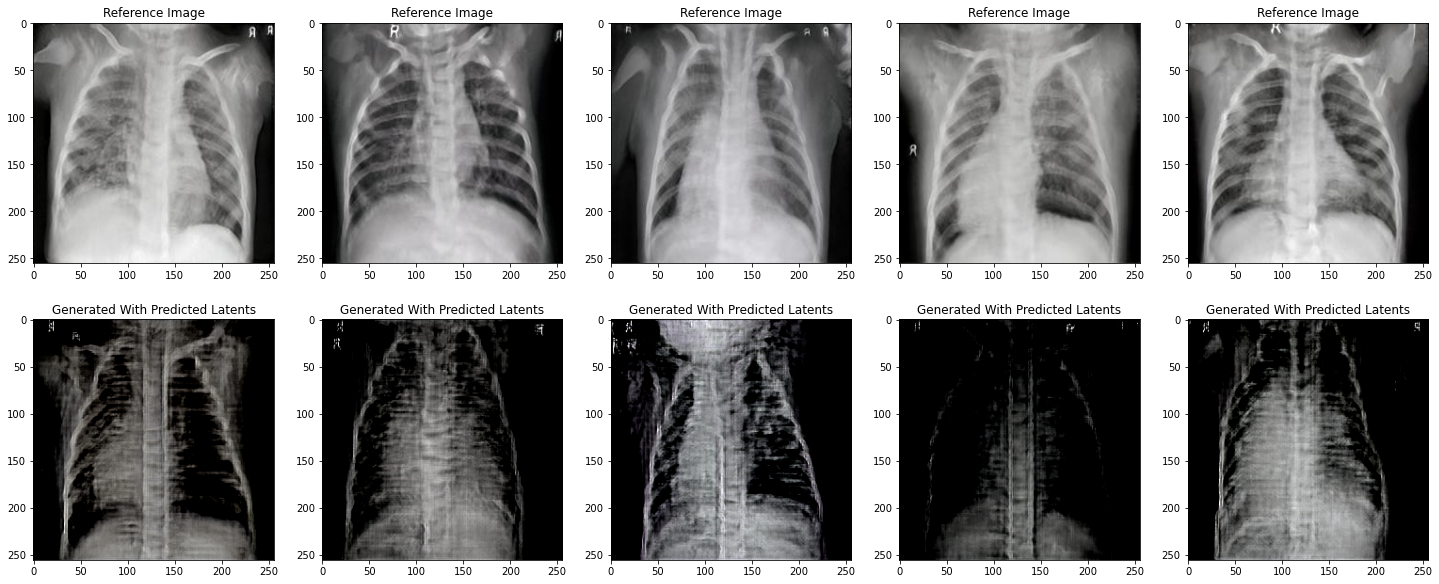

In [133]:
figure = plt.figure(figsize=(25,10))
columns = len(normal_images)
rows = 2

axis = []

for i in range(columns):
    axis.append(figure.add_subplot(rows, columns, i + 1))
    axis[-1].set_title("Reference Image")
    plt.imshow(normal_images[i])

for i in range(columns, columns*rows):
    axis.append(figure.add_subplot(rows, columns, i + 1))
    axis[-1].set_title("Generated With Predicted Latents")
    plt.imshow(pred_images[i - columns])

plt.show()